## Table of Contents
* [Introduction](#chapter1)
* [Overview](#chapter2)
* [Netflix Analysis](#chapter3)
    * [Top Ten Ranking Across Countries](#section_3_1)
    * [View Time ](#section_3_2)
* [Twitter Analysis](#chapter4)
    * [The Numbers](#section_4_1)
    * [Tweets per day](#section_4_2)
    * [Most active tweeters](#section_4_3)
    * [Top mentions](#section_4_4)
    * [Top Locations](#section_4_5)
    * [Top likes and retweets](#section_4_6)
    * [Word Cloud](#section_4_7)
    * [Sentiments](#section_4_8)
    * [Dashboard](#section_4_9)
* [Google Trends Analysis](#chapter5)
    * [Nigeria Trend](#section_5_1)
    * [Global Trend](#section_5_2)
* [Conclusion](#chapter6)
    * [Time Range](#section_6_1)
    * [Performance](#section_6_2)
    * [Netflix](#section_6_3)
    * [Twitter](#section_6_4)
    * [Google Trend](#section_6_4)
* [My Profile](#chapter7)


## Introduction <a class="anchor" id="chapter1"></a>

Aníkúlápó is a 2022 Nigerian epic fantasy film produced by Kunle Afolayan and distributed by Netflix. Released on 30 September 2022, it stars Kunle Remi, Bimbo Ademoye, Sola Sobowale,Hakeem Kae-Kazim and Taiwo Hassan.The film was shot in Oyo State and Afolayan has described the work as a "Game of Thrones recreated in Nigeria but with a better representation of our culture (Yoruba culture)".

Since its release, Aníkúlápó garnered alot of comments and reviews leading to its popularity, attracting conversations from social media. This analysis explores the performance( Ratings and reviews) of the movie, since its release and what people are saying about the movie.

## Methodology<a class="anchor" id="chapter2"></a>

Data was collected from twitter, netfix, google e.t.c to explore the buzz around the movie on twitter, country's attraction and view time on netflix and curiosity of people on google.
Note: The numbers in this report are not exhaustive, but a worthy sample.

The time range for the analysis was between September 29 2022 (a day to its release) to October 15 2022.

In [2]:
# import library

import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sb
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import snscrape.modules.twitter as sntwitter
import requests
from bs4 import BeautifulSoup


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### Reviews and Ratings 

- IMDB- 5.3/10
- Google Users - 94/100
- Common Sense Media - 3/5
- Rotten Tomatoes(audience score) - 8/10


## Netflix Analysis <a class="anchor" id="chapter3"></a>
Aníkúlápó premiered on Netflix on September 30th, 2022, I collected data from Netflix to analyze top countries that streamed the movies and the weekly view time in its first 3 weeks of release.

In [3]:
all_countries=pd.read_excel('all-weeks-countries.xlsx')

C:\Users\HP\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
all_countries.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-11-13,Films,1,Enola Holmes 2,NaN,2
1,Argentina,AR,2022-11-13,Films,2,Medieval,NaN,1
2,Argentina,AR,2022-11-13,Films,3,Falling for Christmas,NaN,1
3,Argentina,AR,2022-11-13,Films,4,The Chalk Line,NaN,2
4,Argentina,AR,2022-11-13,Films,5,Lost Bullet 2,NaN,1


In [5]:
all_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134620 entries, 0 to 134619
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                134620 non-null  object
 1   country_iso2                134620 non-null  object
 2   week                        134620 non-null  object
 3   category                    134620 non-null  object
 4   weekly_rank                 134620 non-null  int64 
 5   show_title                  134620 non-null  object
 6   season_title                65259 non-null   object
 7   cumulative_weeks_in_top_10  134620 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 8.2+ MB


In [7]:
all_countries.duplicated().sum()

0

In [ ]:
#filter for show_title Anikulapo 

In [23]:
copy1=all_countries[all_countries['show_title']=='Aníkúlápó']

In [24]:
copy1['week'].value_counts()

2022-10-09    24
2022-10-02     5
2022-10-30     1
2022-11-06     1
2022-10-16     1
2022-11-13     1
2022-10-23     1
Name: week, dtype: int64

In [25]:
#filter for only the first 3 weeks
copy1=copy1[(copy1['week']<='2022-10-16') & (copy1['week']>='2022-10-02')]

### Attractions

The movie attracted attention from 24  different countries in its first 3 weeks of realease.

In [26]:
#involved countries 
print(len(copy1['country_name'].value_counts()))
copy1['country_name'].value_counts()

24


Nigeria                 3
Guadeloupe              2
Morocco                 2
Martinique              2
Réunion                 2
Venezuela               1
Chile                   1
New Caledonia           1
Brazil                  1
Romania                 1
Dominican Republic      1
Poland                  1
Saudi Arabia            1
United Arab Emirates    1
Israel                  1
Bahrain                 1
Kuwait                  1
Peru                    1
Paraguay                1
Oman                    1
Kenya                   1
Portugal                1
Colombia                1
Panama                  1
Name: country_name, dtype: int64

### Top Ten Ranking Across Countries <a class="anchor" id="section_3_1"></a>

Popularity of the movie increased in the 2nd week.

In [28]:
copy1.pivot_table('weekly_rank',['country_name'], 'week').sort_values(by=['2022-10-09'], ascending=True)[:10]

week,2022-10-02,2022-10-09,2022-10-16
country_name,,,
Nigeria,1.0,1.0,2.0
Martinique,6.0,3.0,NaN
Oman,NaN,4.0,NaN
Guadeloupe,6.0,4.0,NaN
New Caledonia,NaN,5.0,NaN
Morocco,9.0,5.0,NaN
Réunion,8.0,5.0,NaN
Romania,NaN,5.0,NaN
Peru,NaN,6.0,NaN


### View Time <a class="anchor" id="section_3_2"></a>

After a steady increase in the first and second week, the view time decreased on its 3rd week.

In [ ]:
all_global=pd.read_excel('all-weeks-global.xlsx')

In [29]:
all_global.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-11-13,Films (English),1,Enola Holmes 2,NaN,62860000,2
1,2022-11-13,Films (English),2,Falling for Christmas,NaN,48360000,1
2,2022-11-13,Films (English),3,Enola Holmes,NaN,18650000,2
3,2022-11-13,Films (English),4,Medieval,NaN,18230000,1
4,2022-11-13,Films (English),5,The Good Nurse,NaN,15060000,3


In [45]:
all_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   week                        2880 non-null   object
 1   category                    2880 non-null   object
 2   weekly_rank                 2880 non-null   int64 
 3   show_title                  2880 non-null   object
 4   season_title                1399 non-null   object
 5   weekly_hours_viewed         2880 non-null   int64 
 6   cumulative_weeks_in_top_10  2880 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 157.6+ KB


In [47]:
all_global.duplicated().sum()

0

In [34]:
copy2=all_global[all_global['show_title']=='Aníkúlápó']

In [35]:
#filter for only the first 3 weeks
copy2=copy2[(copy2['week']<='2022-10-16') & (copy2['week']>='2022-10-02')]

In [351]:
copy2[['week', 'weekly_hours_viewed']]

,week,weekly_hours_viewed
176,2022-10-16,3030000
210,2022-10-09,8730000
254,2022-10-02,2680000


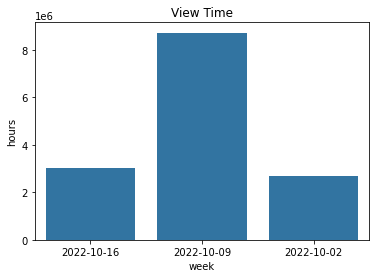

In [366]:
default_color = sb.color_palette()[0]
sb.barplot(data = copy2, x='week', y='weekly_hours_viewed', color = default_color)
x_y_t('week', 'hours', 'View Time')
plt.show()

## Twitter Analysis <a class="anchor" id="chapter4"></a>

The series premiered on Netflix on September 30th, 2022.Twitter Data collection was between 29 September to 14 October 2022 - a total of 15 days using the keyword "anikulapo". Anikulapo is a popular name in Nigeria, hence I made sure to filter out users with having the name 'anikulapo' without engaging in the movie 'Anikulapo'. For example 'anikulapo_kush7' tweeted multiple times, but none of them were about the movie. Findings of analysis and a dashboard summary are presented.


In [178]:
''''
# Creating list to append tweet data to
attributes_container = []

#peter obi
# Using TwitterSearchScraper to scrape data and append tweets to list
for tweet in sntwitter.TwitterSearchScraper('Anikulapo since:2022-09-29 until:2022-10-15').get_items():
    attributes_container.append([tweet.user.username, tweet.date, tweet.user.location, tweet.user.followersCount,
                                 tweet.likeCount, tweet.retweetCount, tweet.content, tweet.mentionedUsers])

# Creating a dataframe to load the list
ani_df = pd.DataFrame(attributes_container, columns=["User", "Date Created", 'location','followers',
                                                        "Likes", 'retweet', "Tweet", 'Mentions'])
                                                        

# save df to csv
ani_df.to_csv("anikulapo.csv", index=False)


In [3]:
ani_df=pd.read_csv('anikulapo.csv', parse_dates=['Date Created'])

In [4]:
ani_df

,User,Date Created,location,followers,Likes,retweet,Tweet,Mentions
0,DukeMotherland,2022-10-14 23:55:59+00:00,"Lagos, Nigeria",3664,25,7,ARREST THE MUSIC ✊🏿\n(Tribute to Fela Anikulap...,NaN
1,AyubaKudus,2022-10-14 23:46:34+00:00,NaN,307,0,0,@khalidmovic Anikulapo,"[User(username='khalidmovic', id=138728457, di..."
2,Caprifina,2022-10-14 23:44:52+00:00,Nigeria,725,1,0,Please can someone tell me the meaning of “Ani...,NaN
3,Rohees_,2022-10-14 23:40:59+00:00,Under the sun,2448,5,1,"Anikulapo is a masterpiece, the best epic movi...",NaN
4,theJohnKey,2022-10-14 23:39:52+00:00,The Ville,1371,0,0,Lol this Anikulapo movie dey give Acrimony vib...,NaN
...,...,...,...,...,...,...,...,...
24391,Dammylink,2022-09-29 07:35:51+00:00,NaN,94,0,0,@DailyPostNGR Fela Anikulapo warned us in his ...,"[User(username='DailyPostNGR', id=413428207, d..."
24392,loadedtuneng,2022-09-29 07:32:29+00:00,"Lagos, Nigeria",101,0,0,ANIKULAPO – latest yoruba movie 2022 https://t...,NaN
24393,MsFisayo,2022-09-29 05:35:00+00:00,Abroad with 24hrs Light,4533,0,2,I’m looking forward to #Anikulapo more than an...,NaN
24394,LarraAimar,2022-09-29 05:18:25+00:00,⛰️,88,2,0,Inédita imagen de yo saltando a través de la v...,NaN


In [5]:
ani_df.duplicated().sum()

1

In [6]:
ani_df.isna().sum()

User                0
Date Created        0
location         5821
followers           0
Likes               0
retweet             0
Tweet               0
Mentions        18636
dtype: int64

In [7]:
ani_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24396 entries, 0 to 24395
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   User          24396 non-null  object             
 1   Date Created  24396 non-null  datetime64[ns, UTC]
 2   location      18575 non-null  object             
 3   followers     24396 non-null  int64              
 4   Likes         24396 non-null  int64              
 5   retweet       24396 non-null  int64              
 6   Tweet         24396 non-null  object             
 7   Mentions      5760 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 1.5+ MB


In [8]:
ani_df[(ani_df['User'].str.lower().str.contains('aniku'))]

,User,Date Created,location,followers,Likes,retweet,Tweet,Mentions
406,anikulapo_kush7,2022-10-13 18:38:17+00:00,Blockchain,6,1,0,🌗🚨 https://t.co/FrAYoq5kBc,NaN
413,anikulapo_kush7,2022-10-13 18:28:14+00:00,Blockchain,6,0,0,@bod_republic Kai na 😓,"[User(username='bod_republic', id=3138923027, ..."
416,anikulapo_kush7,2022-10-13 18:20:02+00:00,Blockchain,6,0,0,@helen_suzzy Violence 🚨,"[User(username='helen_suzzy', id=1514396937142..."
417,anikulapo_kush7,2022-10-13 18:19:47+00:00,Blockchain,6,0,0,@helen_suzzy Haaa 😂,"[User(username='helen_suzzy', id=1514396937142..."
425,anikulapo_kush7,2022-10-13 18:03:47+00:00,Blockchain,6,1,0,@moyesolowo @boy_director Tbh the guy try 🌚✌️💯,"[User(username='moyesolowo', id=10337822901057..."
428,anikulapo_kush7,2022-10-13 18:00:24+00:00,Blockchain,6,0,0,@boy_director Ohh 😮 well bonze is trying to be...,"[User(username='boy_director', id=793789790, d..."
431,anikulapo_kush7,2022-10-13 17:46:18+00:00,Blockchain,6,1,0,#NewProfilePic https://t.co/3lArQ0FsRR,NaN
902,Anikulap0,2022-10-12 15:12:09+00:00,Trenches,9953,3,1,"LAPO are after my life, AnikuLAPO 😭",NaN
1501,TheAnikulapo,2022-10-11 08:56:27+00:00,Odogwu marine.,68,0,0,I AM THE REAL ANIKULAPO.... I'm the remnant of...,NaN
6771,Anikulap0,2022-10-06 12:09:42+00:00,Trenches,9953,2,0,30mins into this Anikulapo movie and I can alr...,NaN


### Text Cleaning

In [10]:
# Make a copy of original pieces of data
copy1=ani_df.copy()

In [11]:
#Exclude tweet containing anikulapo that isnt about the movie 
copy1=copy1[(copy1['User'].str.lower().str.contains('anikulapo_kush7')==False) &
      (copy1['User'].str.lower().str.contains('kinganikulapo')==False) &
     (copy1['User'].str.lower().str.contains('TheAnikulapo')==False) &
      (copy1['User'].str.lower().str.contains('Anikulapo_kuti')==False)]

In [12]:
#drop duplicates
copy1.drop_duplicates(inplace=True)

In [13]:
#convert tweets to lower case
copy1['tweet']=copy1['Tweet'].str.lower()

In [14]:
#Clean the text 

#Create a function to clean the tweets

def cleanTxt(text):
    
    #Remove keyword
    text=re.sub(r'anikulapo', '', text) 
    #Remove @mentions
    text=re.sub(r'@[A-Za-z0-9]+', '', text) 
    #Remove hashtags
    text=re.sub(r'#', '', text) 
    #Remove underscores
    text=re.sub(r'_', '', text) 
    #Remove retweets
    text=re.sub(r'RT[\s]+', '', text) 
    #Remove hyperlinks
    text=re.sub(r'https?:\/\/\S+', '', text) 
    #Remove punctuations
    text=re.sub(r'[^\w\s]', '', text)
    
    return text

copy1['tweet']=copy1['tweet'].apply(cleanTxt)

In [15]:
# Tokenization 
nltk.download('punkt')

#tokenize 
copy1['tweet'] = copy1.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [16]:
#stop words 
stop = stopwords.words('english')

copy1['tweet'] = copy1['tweet'].apply(lambda x: [item for item in x if item not in stop])

In [60]:
copy1

,User,Date Created,location,followers,Likes,retweet,Tweet,Mentions,tweet,mentions,subjectivity,polarity,sentiment
0,DukeMotherland,2022-10-14 23:55:59+00:00,"Lagos, Nigeria",3664,25,7,ARREST THE MUSIC ✊🏿\n(Tribute to Fela Anikulap...,NaN,"[arrest, music, tribute, fela, kuti, would, 84...",,0.122222,0.072222,positive
1,AyubaKudus,2022-10-14 23:46:34+00:00,NaN,307,0,0,@khalidmovic Anikulapo,"[User(username='khalidmovic', id=138728457, di...",[],khalidmovic,0.000000,0.000000,neutral
2,Caprifina,2022-10-14 23:44:52+00:00,Nigeria,725,1,0,Please can someone tell me the meaning of “Ani...,NaN,"[please, someone, tell, meaning, curious]",,1.000000,-0.100000,negative
3,Rohees_,2022-10-14 23:40:59+00:00,Under the sun,2448,5,1,"Anikulapo is a masterpiece, the best epic movi...",NaN,"[masterpiece, best, epic, movie, far]",,0.566667,0.400000,positive
4,theJohnKey,2022-10-14 23:39:52+00:00,The Ville,1371,0,0,Lol this Anikulapo movie dey give Acrimony vib...,NaN,"[lol, movie, dey, give, acrimony, vibes, na, e...",,0.700000,0.800000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24391,Dammylink,2022-09-29 07:35:51+00:00,NaN,94,0,0,@DailyPostNGR Fela Anikulapo warned us in his ...,"[User(username='DailyPostNGR', id=413428207, d...","[fela, warned, us, 70, amp, 80s, album, still,...",DailyPostNGR,0.000000,0.000000,neutral
24392,loadedtuneng,2022-09-29 07:32:29+00:00,"Lagos, Nigeria",101,0,0,ANIKULAPO – latest yoruba movie 2022 https://t...,NaN,"[latest, yoruba, movie, 2022]",,0.900000,0.500000,positive
24393,MsFisayo,2022-09-29 05:35:00+00:00,Abroad with 24hrs Light,4533,0,2,I’m looking forward to #Anikulapo more than an...,NaN,"[im, looking, forward, anything, weekend, miss...",,0.000000,0.000000,neutral
24394,LarraAimar,2022-09-29 05:18:25+00:00,⛰️,88,2,0,Inédita imagen de yo saltando a través de la v...,NaN,"[inédita, imagen, de, yo, saltando, través, de...",,0.000000,0.000000,neutral


In [62]:
copy1[['User', 'Date Created', 'Likes', 'retweet', 'sentiment']].to_csv("ani_cleaned.csv", index=False)

### The Numbers <a class="anchor" id="section_3_1"></a>

Tweets collected contained 24388 tweets, gathered 503,067 likes and 97176 retweets, with 17,481 unique users.

In [324]:
#Numbers 
tweets=copy1.shape[0]
likes=sum(copy1['Likes'])
retweets=sum(copy1['retweet'])

print('Number of tweets = ' ,tweets)
print('Number of likes = ',likes,)
print('Number of retweets = ' ,retweets)
print('Number of Users = ', len(copy1['User'].unique()))



Number of tweets =  24388
Number of likes =  503067
Number of retweets =  97176
Number of Users =  17481


In [27]:
def x_y_t(xaxis, yaxis, title):
    #this function contains graph titles
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)

### Tweets per day <a class="anchor" id="section_3_2"></a>

Tweets per day peaked on the first week of its release.

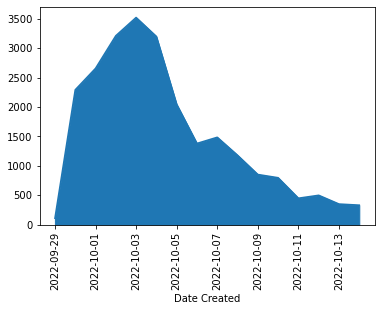

In [19]:
#Tweets per day 
tweets_per_day = copy1.groupby([copy1['Date Created'].dt.date])['Tweet'].count()
tweets_per_day.plot(kind='area')
plt.xticks(rotation=90);

In [22]:
tweets_per_day.to_csv("tweets_per_day.csv", index=False)

In [21]:
tweets_per_day=tweets_per_day.reset_index()

### Most active tweeters <a class="anchor" id="section_3_3"></a>

In [23]:
#Most active tweeters
active_tweeters = copy1.groupby([copy1['User']])['Tweet'].count()
active_tweeters.sort_values(ascending=False)[:20]

User
manlike22          62
qedng              44
bidemi42           33
OjoObaRihanot      29
Ada_TheDiva        29
jaiyeorie247       26
NewlyPosted        25
realahmed_01       20
aba_your           20
Aminamedia2000     19
ntmdotng           19
Escrow_Afrik       19
remiopakunle       18
freshfmlagos       18
WKM_Up             18
KanyinCollecti1    18
Mz__Mo             17
loadedtuneng       17
PeterObiUpdates    17
everyevery_ng      17
Name: Tweet, dtype: int64

In [24]:
active_tweeters=active_tweeters.reset_index()

In [26]:
active_tweeters.to_csv("active_tweeters.csv", index=False)

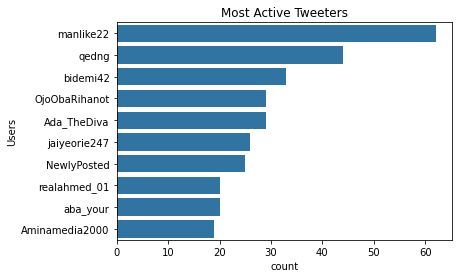

In [28]:
default_color = sb.color_palette()[0]
sb.barplot(data = active_tweeters.sort_values(by=['Tweet'], ascending=False)[:10], y='User', x='Tweet', color = default_color)
x_y_t('count', 'Users', 'Most Active Tweeters')


### Top mentions <a class="anchor" id="section_3_4"></a>

Kunle Afolayan significantly had the most mentions, as he his the producer and director of the movie. Top mentions also attracted major actors from the movies such as Bimbo Ademoye, Kunle Remi and Adebowale Adedayo (Mr Macaroni)

In [29]:
copy1['mentions']=copy1.Tweet.str.findall(r'(?<![@\w])@(\w{1,25})').apply(','.join)

In [30]:
copy1_mentions= copy1.assign(mentions=copy1['mentions'].str.split(',')).explode('mentions')  

In [41]:
top_mentions = copy1_mentions.groupby([copy1_mentions['mentions']])['Tweet'].count()
top_mentions.sort_values(ascending=False)[:11]

mentions
                 18542
kunleafolayan     1020
BimboAdemoye       216
KunleRemi          178
NetflixNaija       153
bod_republic       108
Ekitipikin         107
Naija_PR           107
mrmacaronii        107
netflix             72
FS_Yusuf_           64
Name: Tweet, dtype: int64

In [43]:
top_mentions=top_mentions.reset_index()

In [45]:
top_mentions

,mentions,Tweet
0,,18542
1,01_jay2,1
2,0THE_REAL_DEVIL,1
3,0masanjuwa,1
4,0najite,1
...,...,...
3648,zizzycarter,1
3649,zlatan_ibile,1
3650,zonguiati,1
3651,zumamalicious,1


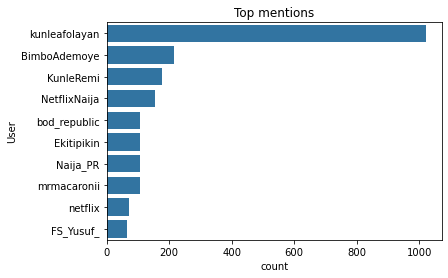

In [47]:
default_color = sb.color_palette()[0]
sb.barplot(data = top_mentions.sort_values(by=['Tweet'], ascending=False)[1:11], y='mentions', x='Tweet', color = default_color)
x_y_t('count', 'User', 'Top mentions')


In [48]:
top_mentions.to_csv("top_mentions.csv", index=False)

In [332]:
#top mentioned actors 
top_mentioned_actors = {'Actors': ['kunleafolayan', 'BimboAdemoye', 'KunleRemi','mrmacaronii', 'SolaSobowaleTKV'],
        'count': [1046, 221, 180, 110, 22 ]}
# Create DataFrame  
df = pd.DataFrame(top_mentioned_actors)
df

,Actors,count
0,kunleafolayan,1046
1,BimboAdemoye,221
2,KunleRemi,180
3,mrmacaronii,110
4,SolaSobowaleTKV,22


### Top Location <a class="anchor" id="section_3_5"></a>

From the publicly disclosed location on twitter, Lagos significantly tops the chat here. There are also notable engagements from countries outside Nigeria.

In [49]:
#location cleaning 
copy1_location= copy1.assign(location=copy1['location'].str.split(' /|;|,.')).explode('location')  

In [52]:
df.to_csv("top_location.csv", index=False)

In [50]:
top_location = {'location': ['Lagos', 'Abuja', 'United Kingdom', 'Ibadan', 'USA', 'Ilorin', 'Port Harcourt', 'Canada', 'Ghana',
                            'Enugu'],
        'count': [(4506+97+93), (693+125) ,(347+250+225), 449, 138, 130, 119,(93+88), 99, 82]}
# Create DataFrame  
df = pd.DataFrame(top_location)
df

,location,count
0,Lagos,4696
1,Abuja,818
2,United Kingdom,822
3,Ibadan,449
4,USA,138
5,Ilorin,130
6,Port Harcourt,119
7,Canada,181
8,Ghana,99
9,Enugu,82


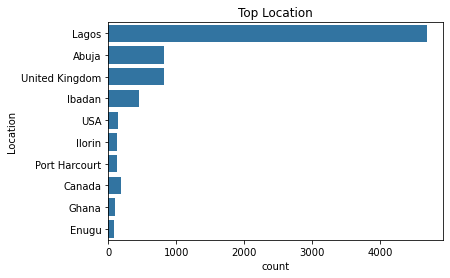

In [363]:
default_color = sb.color_palette()[0]
sb.barplot(data =df, y='location', x='count', color = default_color)
x_y_t('count', 'Location', 'Top Location')

### Word Cloud <a class="anchor" id="section_3_7"></a>
From the total tweets gathered, the visual below gives a representation of top words used.

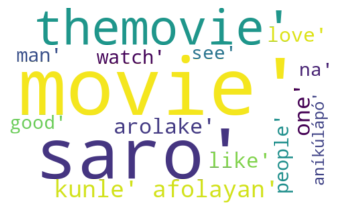

In [336]:
allWords = ' '.join([str(twts) for twts in copy1['tweet']])
wordCloud=WordCloud(width = 500, height=300,max_font_size=119, background_color="rgba(255, 255, 255, 0)",
                    mode="RGBA", max_words=15).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Sentiments <a class="anchor" id="section_3_8"></a>

In [54]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
copy1['subjectivity']=copy1['tweet'].apply(lambda x: getSubjectivity(' '.join(x)))
copy1['polarity']=copy1['tweet'].apply(lambda x: getPolarity(' '.join(x)))

In [55]:
def get_tweet_sentiment(score): 
    '''Utility function to classify sentiment of passed tweet using textblob's sentiment method'''
    # create TextBlob object of passed tweet text 
   # analysis = TextBlob(tweet) 
    
    # set sentiment 
    if score > 0:
        return 'positive'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'negative'
    
copy1['sentiment'] = copy1['polarity'].apply(get_tweet_sentiment)

In [57]:
sentiment=copy1.groupby([copy1['sentiment']])['Tweet'].count()

In [59]:
sentiment=sentiment.reset_index()

In [339]:
copy1['sentiment'].value_counts()

neutral     11718
positive     9846
negative     2824
Name: sentiment, dtype: int64

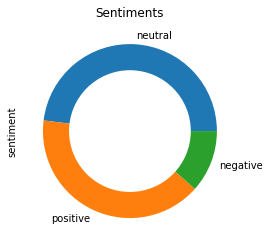

In [340]:
# Pie Chart
copy1['sentiment'].value_counts().plot(kind='pie')
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Sentiments')
  
# Displaying Chart
plt.show()

### Top likes and retweets <a class="anchor" id="section_3_6"></a>

### Top 4 Mentions and Associated Words

In [341]:
print('Kunle Remi:' , copy1[(copy1['Tweet'].str.lower().str.contains('kunle remi'))].shape[0])
print('@KunleRemi:' , copy1[(copy1['Tweet'].str.lower().str.contains('kunleremi'))].shape[0])
print('Saro:' , copy1[(copy1['Tweet'].str.lower().str.contains('saro'))].shape[0])

Kunle Remi: 278
@KunleRemi: 217
Saro: 3482


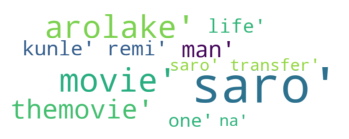

In [342]:
saro_word=copy1[(copy1['Tweet'].str.lower().str.contains('kunleremi')) | 
                (copy1['Tweet'].str.lower().str.contains('kunle remi')) |(copy1['Tweet'].str.lower().str.contains('saro'))]
allWords = ' '.join([str(twts) for twts in saro_word['tweet']])
wordCloud=WordCloud(width = 800, height=300,max_font_size=119, background_color="rgba(255, 255, 255, 0)",
                    mode="RGBA", max_words=10).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [343]:
print('Bimbo Ademoye:' , copy1[(copy1['Tweet'].str.lower().str.contains('bimbo ademoye'))].shape[0])
print('@BimboAdemoye:' , copy1[(copy1['Tweet'].str.lower().str.contains('bimboademoye'))].shape[0])
print('Arolake:' , copy1[(copy1['Tweet'].str.lower().str.contains('arolake'))].shape[0])

Bimbo Ademoye: 494
@BimboAdemoye: 247
Arolake: 1460


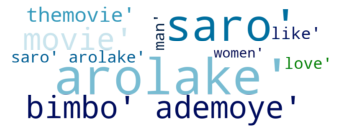

In [344]:
arolake_word=copy1[(copy1['Tweet'].str.lower().str.contains('bimbo ademoye')) | 
                (copy1['Tweet'].str.lower().str.contains('bimboademoye')) |(copy1['Tweet'].str.lower().str.contains('arolake'))]
allWords = ' '.join([str(twts) for twts in arolake_word['tweet']])
wordCloud=WordCloud(width = 800, height=300,max_font_size=119, background_color="rgba(255, 255, 255, 0)",
                    mode="RGBA", max_words=10, colormap = 'ocean').generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [345]:
print('Sola Sobowale:' , copy1[(copy1['Tweet'].str.lower().str.contains('sola sobowale'))].shape[0])
print('@SolaSobowaleTKV:' , copy1[(copy1['Tweet'].str.lower().str.contains('solasobowaletkv'))].shape[0])
print('Awarun:' , copy1[(copy1['Tweet'].str.lower().str.contains('awarun'))].shape[0])

Sola Sobowale: 95
@SolaSobowaleTKV: 22
Awarun: 201


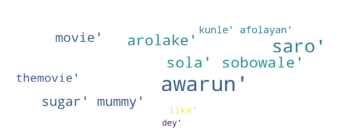

In [346]:
awarun_word=copy1[(copy1['Tweet'].str.lower().str.contains('sola sobowale')) | 
                (copy1['Tweet'].str.lower().str.contains('solasobowaletkv')) |(copy1['Tweet'].str.lower().str.contains('awarun'))]
allWords = ' '.join([str(twts) for twts in awarun_word['tweet']])
wordCloud=WordCloud(width = 800, height=300,max_font_size=50, background_color="rgba(255, 255, 255, 0)",
                    mode="RGBA", max_words=10).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [347]:
print('Adebowale Adedayo:' , copy1[(copy1['Tweet'].str.lower().str.contains('adebowale adedayo'))].shape[0])
print('@mrmacaronii:' , copy1[(copy1['Tweet'].str.lower().str.contains('mrmacaronii'))].shape[0])
print('Akanji:' , copy1[(copy1['Tweet'].str.lower().str.contains('akanji'))].shape[0])

Adebowale Adedayo: 2
@mrmacaronii: 104
Akanji: 53


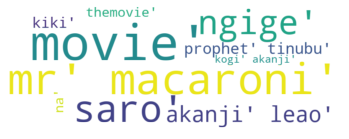

In [348]:
akanji_word=copy1[(copy1['Tweet'].str.lower().str.contains('adebowale adedayo')) | 
                (copy1['Tweet'].str.lower().str.contains('mrmacaronii')) |(copy1['Tweet'].str.lower().str.contains('akanji'))]
allWords = ' '.join([str(twts) for twts in akanji_word['tweet']])
wordCloud=WordCloud(width = 800, height=300,max_font_size=119, background_color="rgba(255, 255, 255, 0)",
                    mode="RGBA", max_words=10).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [349]:
### Most liked tweet
copy1.sort_values(by=['Likes'], ascending=False)[:5]

,User,Date Created,location,followers,Likes,retweet,Tweet,Mentions,tweet,mentions,subjectivity,polarity,sentiment
21256,Fortis_OWO,2022-10-01 10:04:44+00:00,Wherever my heart is.,12280,22401,4076,So Kunle Afolayan bought Acres of land in Ibad...,NaN,"[kunle, afolayan, bought, acres, land, ibadan,...",,0.000,0.000000,neutral
18812,mrmacaronii,2022-10-02 08:19:39+00:00,Nigeria,3070849,19294,1325,ANIKULAPO!!! https://t.co/3IELKZoYyM,NaN,[],,0.000,0.000000,neutral
5787,kunleafolayan,2022-10-07 07:53:08+00:00,"Lagos, Nigeria",170696,15413,3571,ANIKULAPO- Saro and Arolake finally resolved t...,"[User(username='KunleRemi', id=318770652, disp...","[saro, arolake, finally, resolved, issues, wat...","KunleRemi,BimboAdemoye,kap_hub,goldeneffects",0.775,0.175000,positive
8599,DamiElebe,2022-10-05 11:23:44+00:00,NaN,101501,14050,4038,Another Anikulapo lesson... And this one is fo...,NaN,"[another, lesson, one, women, find, key, succe...",,0.500,0.233333,positive
23912,_AsiwajuLerry,2022-09-30 12:00:06+00:00,Japa by mindset.,349431,11672,1000,No be Bimbo Ademoye breast be this inside Anik...,NaN,"[bimbo, ademoye, breast, inside, nollywood, du...",,0.000,0.000000,neutral


In [350]:
### Most Retweeted tweet
copy1.sort_values(by=['retweet'], ascending=False)[:5]

,User,Date Created,location,followers,Likes,retweet,Tweet,Mentions,tweet,mentions,subjectivity,polarity,sentiment
21256,Fortis_OWO,2022-10-01 10:04:44+00:00,Wherever my heart is.,12280,22401,4076,So Kunle Afolayan bought Acres of land in Ibad...,NaN,"[kunle, afolayan, bought, acres, land, ibadan,...",,0.000,0.000000,neutral
8599,DamiElebe,2022-10-05 11:23:44+00:00,NaN,101501,14050,4038,Another Anikulapo lesson... And this one is fo...,NaN,"[another, lesson, one, women, find, key, succe...",,0.500,0.233333,positive
5787,kunleafolayan,2022-10-07 07:53:08+00:00,"Lagos, Nigeria",170696,15413,3571,ANIKULAPO- Saro and Arolake finally resolved t...,"[User(username='KunleRemi', id=318770652, disp...","[saro, arolake, finally, resolved, issues, wat...","KunleRemi,BimboAdemoye,kap_hub,goldeneffects",0.775,0.175000,positive
20102,SodiqAgb,2022-10-01 19:15:13+00:00,Metaverse 76H,384,10836,1606,"Kunle Afolayan casted Hakeem Kazeem, a Hollywo...",NaN,"[kunle, afolayan, casted, hakeem, kazeem, holl...",,0.000,0.000000,neutral
21304,naijabased,2022-10-01 09:38:16+00:00,Nigeria,1920,2873,1539,Elders like this torchlight the way for the yo...,NaN,"[elders, like, torchlight, way, youths, baba, ...",,0.000,0.000000,neutral


### Dashboard <a class="anchor" id="section_3_9"></a>

## Google Trends Analysis <a class="anchor" id="chapter5"></a>

### Nigeria Trend <a class="anchor" id="section_3_1"></a>

In [193]:
regions = pd.read_excel('Nigeria.xlsx', sheet_name='GEO')
local_queries = pd.read_excel('Nigeria.xlsx', sheet_name='top queries')
local_topics = pd.read_excel('Nigeria.xlsx', sheet_name='top topics')
local_timeline = pd.read_excel('Nigeria.xlsx', sheet_name='timeline', parse_dates=['Day'])

In [ ]:
#top regions

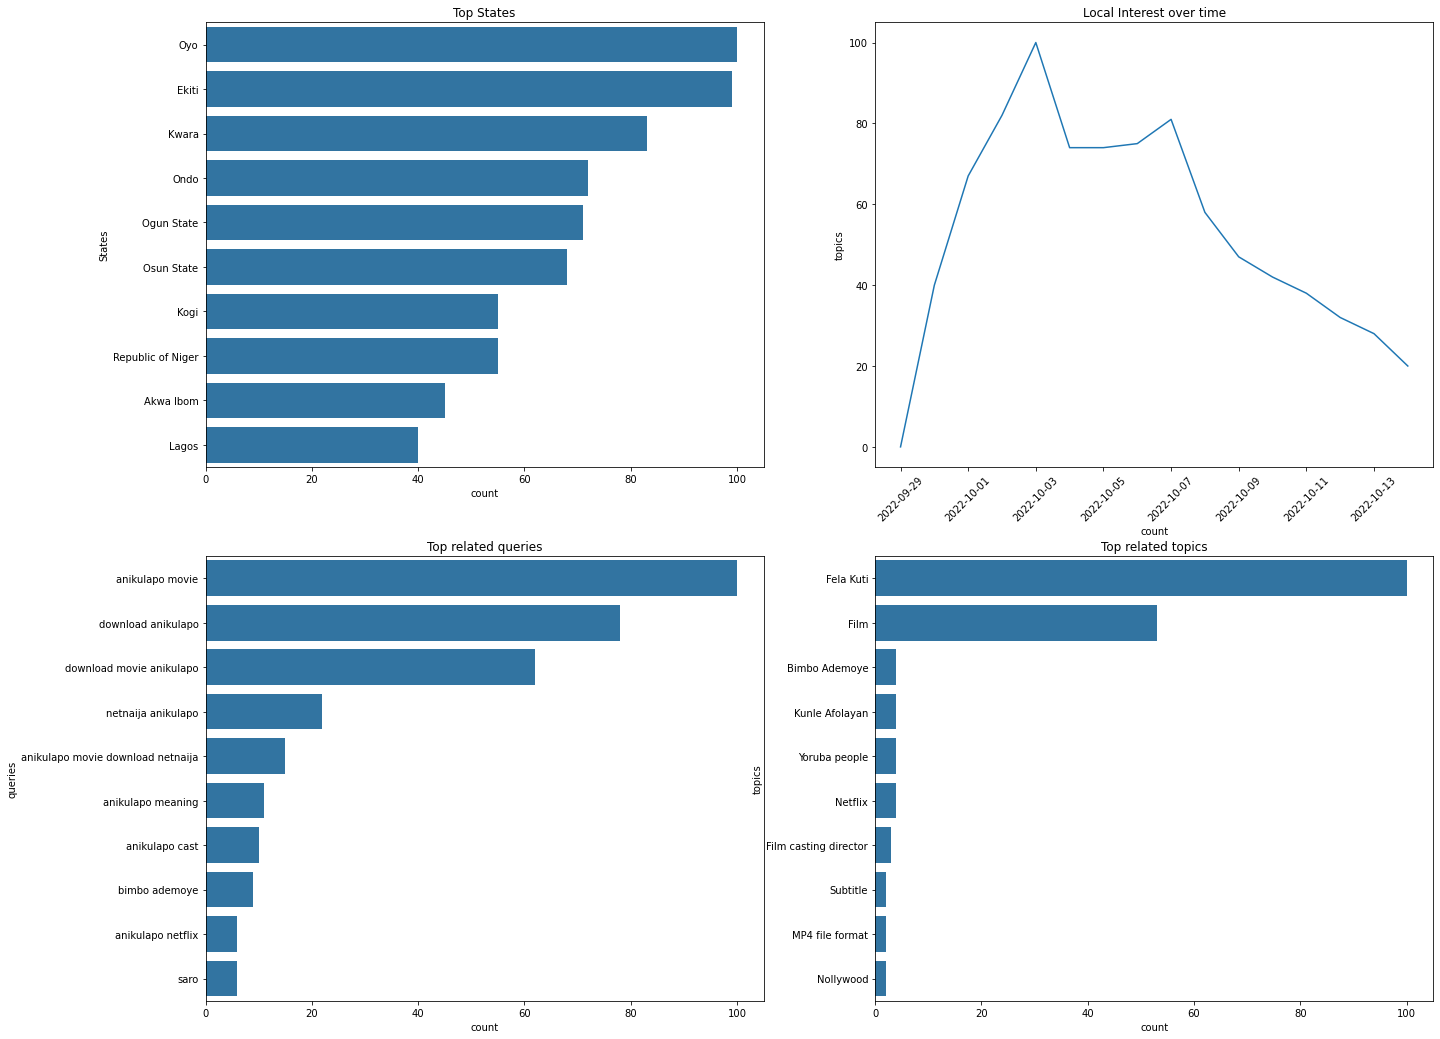

In [260]:
plt.figure(figsize = [22, 18])


plt.subplot(2, 2, 1) 
default_color = sb.color_palette()[0]
sb.barplot(data = regions[:10], x = 'Anikulapo: (29/09/2022 - 14/10/2022)', y= 'Region', color = default_color)
x_y_t('count', 'States', 'Top States')

plt.subplot(2, 2, 3) 
default_color = sb.color_palette()[0]
sb.barplot(data = local_queries[:10], x = 'Unnamed: 1', y= 'TOP', color = default_color)
x_y_t('count', 'queries', 'Top related queries')


plt.subplot(2, 2, 4) 
default_color = sb.color_palette()[0]
sb.barplot(data = local_topics[:10], x = 'Unnamed: 1', y= 'TOP', color = default_color)
x_y_t('count', 'topics', 'Top related topics')


plt.subplot(2, 2, 2) 
default_color = sb.color_palette()[0]
sb.lineplot(data = local_timeline, x = 'Day', y= 'Anikulapo: (Nigeria)', color = default_color)
x_y_t('count', 'topics', 'Local Interest over time')
plt.xticks(rotation=45)


plt.show()


### Global Trend <a class="anchor" id="section_5_2"></a>

In [195]:
countries = pd.read_excel('Global.xlsx', sheet_name='Geo')
global_queries = pd.read_excel('Global.xlsx', sheet_name='top queries')
global_topics = pd.read_excel('Global.xlsx', sheet_name='top topics')
global_timeline = pd.read_excel('Global.xlsx', sheet_name='timeline')

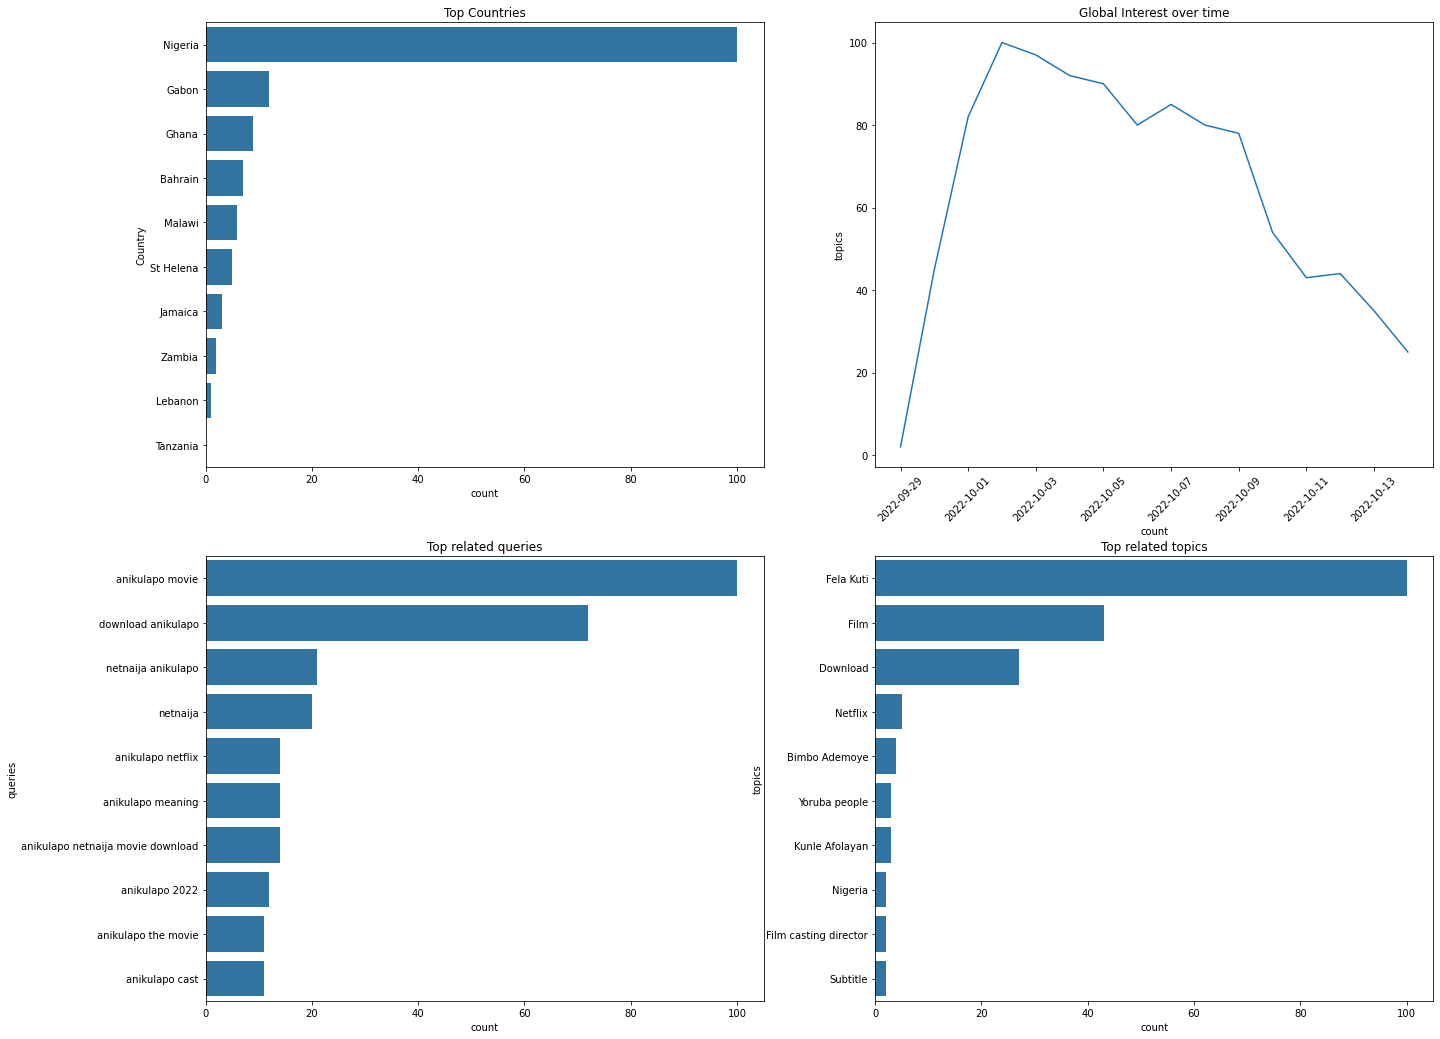

In [261]:
plt.figure(figsize = [22, 18])


plt.subplot(2, 2, 1) 
default_color = sb.color_palette()[0]
sb.barplot(data = countries[:10], x = 'Anikulapo: (29/09/2022 - 14/10/2022)', y= 'Country', color = default_color)
x_y_t('count', 'Country', 'Top Countries')


plt.subplot(2, 2, 3) 
default_color = sb.color_palette()[0]
sb.barplot(data = global_queries[:10], x = 'Unnamed: 1', y= 'TOP', color = default_color)
x_y_t('count', 'queries', 'Top related queries')


plt.subplot(2, 2, 4) 
default_color = sb.color_palette()[0]
sb.barplot(data = global_topics[:10], x = 'Unnamed: 1', y= 'TOP', color = default_color)
x_y_t('count', 'topics', 'Top related topics')


plt.subplot(2, 2, 2) 
default_color = sb.color_palette()[0]
sb.lineplot(data = global_timeline, x = 'Day', y= 'Anikulapo: (Worldwide)', color = default_color)
x_y_t('count', 'topics', 'Global Interest over time')
plt.xticks(rotation=45)

plt.show()


## Conclusion

### Time Range
All data collected are between 29th of September and 14th of October ( A total of 15 days)


### Performance
The movie had a good overall rating from various platforms with a minimun of 53% from IMDb and a Maximum of 94% from Google users. considering the fact that the movie is in a local nigerian language(Yoruba), it gathered attention from various parts of the world. countries such as Martinique, Guadeloupe, Morocco, Réunion rank high 

### Netflix
Attracting attention from 24 distinct countries, making top 10 in over 10 countries in its second week of release and a total view time of 14,440,00 is quite impresive and a good show for the movie.

### Twitter

Twitter was sent into frenzy upon release of the movie, particularly in its first week. With Saro and Arolake being the most talked about character and users engagement from countries such as Canada, UK, USA, and Ghana

### Google Trend

Considering the fact that the movie is of yoruba language, its no surprise to see south western states top the chart in local query. Likewise Western African countries lead the global query